# Imports


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [5]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Example

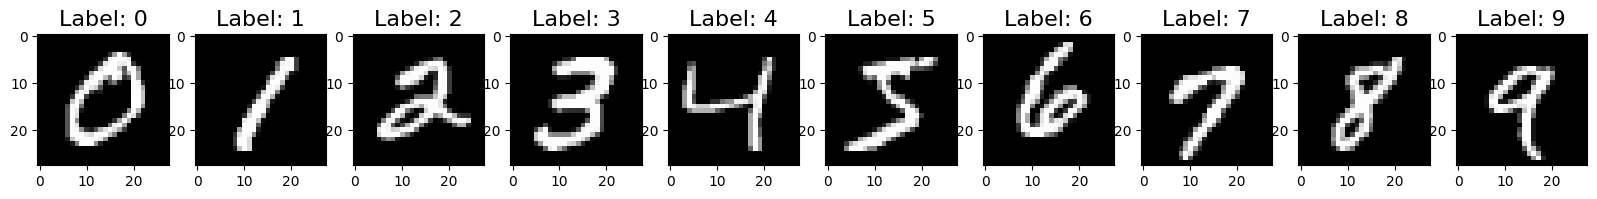

In [9]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [11]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [14]:
#Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
#Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connexted Neural Network

In [17]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train

In [18]:
batch_size = 512
epochs=10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6850 - loss: 1.0703
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9305 - loss: 0.2427
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9490 - loss: 0.1742
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9624 - loss: 0.1307
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9684 - loss: 0.1061
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9723 - loss: 0.0928
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9769 - loss: 0.0793
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9806 - loss: 0.0653
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9826 - loss: 0.0578
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0491


# Evaluate

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9735 - loss: 0.0814
Test Loss: 0.0695631131529808
Test Accuracy: 0.978600025177002


In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[4.8550432e-06 9.9366207e-07 4.5704903e-05 ... 9.9970555e-01
  2.1614446e-06 6.4279329e-06]
 [1.7413678e-06 2.2484336e-04 9.9937922e-01 ... 1.9914868e-08
  1.4199274e-04 3.1065257e-09]
 [3.4704655e-05 9.9899530e-01 2.5505931e-04 ... 2.8037935e-04
  8.2635313e-05 3.0725987e-05]
 ...
 [2.0409607e-09 3.4288394e-08 2.4561604e-09 ... 5.9315676e-07
  2.5125696e-06 2.1541810e-04]
 [3.3058818e-08 6.1288027e-08 1.9060520e-09 ... 7.5414581e-09
  8.4541716e-05 5.0176703e-09]
 [1.1589823e-07 9.0566521e-10 1.2901607e-07 ... 2.3724740e-12
  6.3750103e-09 9.2185544e-11]]
[7 2 1 ... 4 5 6]


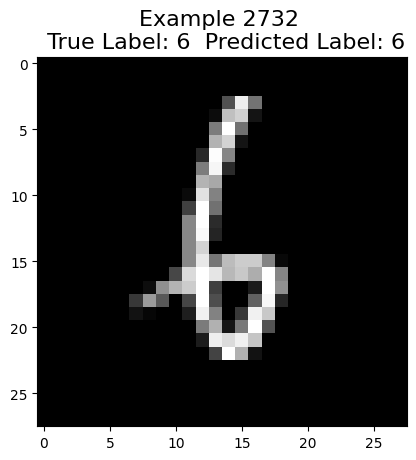

In [21]:
#Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Example {} \n True Label: {}  Predicted Label: {}'.format(random_idx, y_sample_true, y_sample_pred_class), fontsize=16)
plt.imshow(x_sample.reshape((28,28)), cmap='gray')

# Confusion Matrix

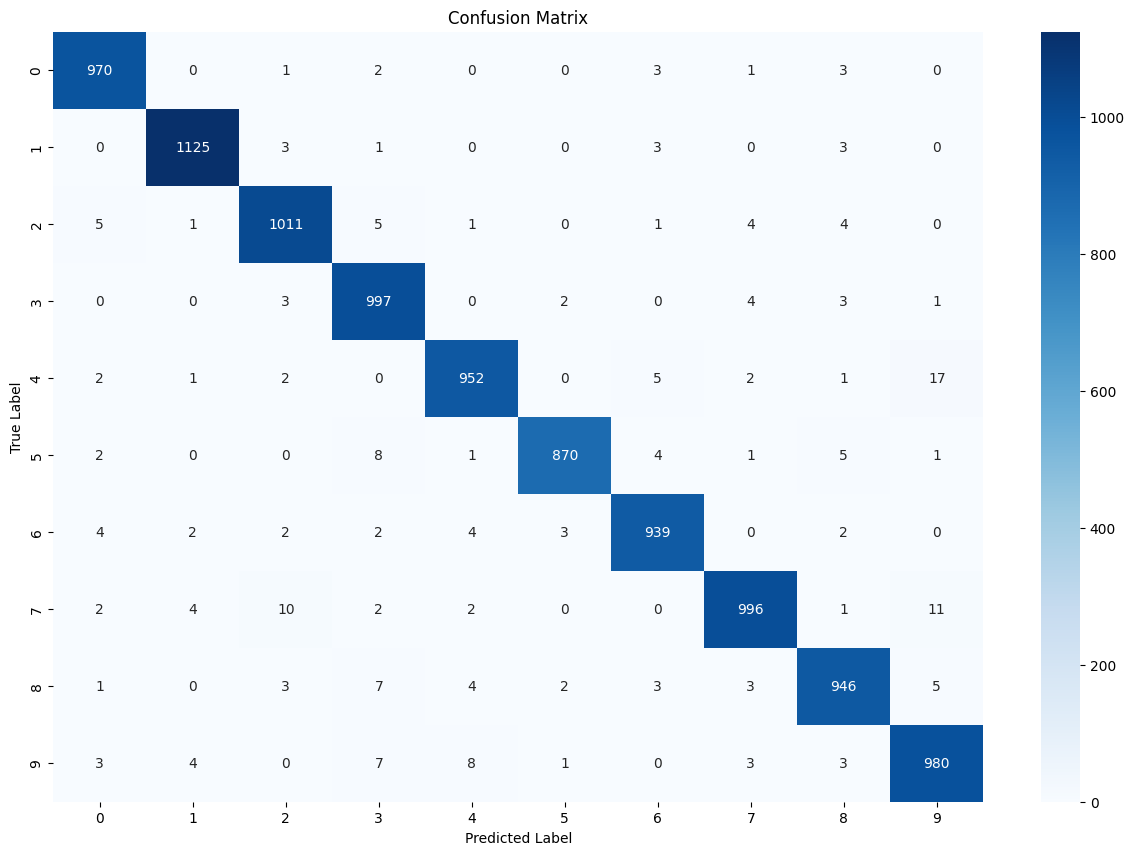

In [22]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, cmap="Blues", fmt= 'd', ax=ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");

# Investigate Errors

In [23]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [24]:
y_pred_errors_prob = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors = y_pred_errors_prob - true_probability_errors

#Get list of indexes of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #5 last ones

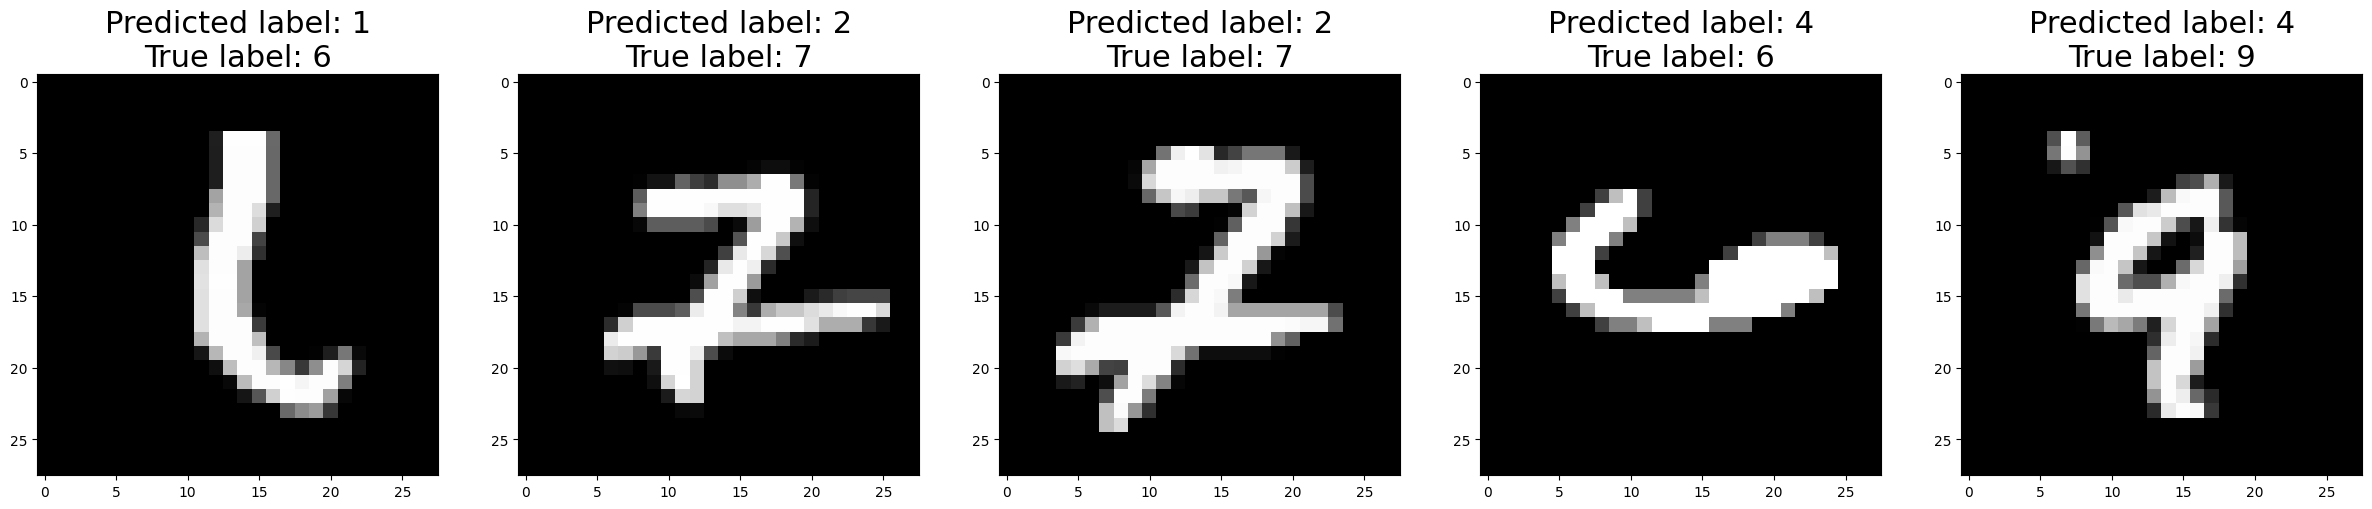

In [25]:
#Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30, 30))
for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape((28,28))
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label: {}\nTrue label: {}".format(y_p, y_t), fontsize=22)